In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/fifa-2021'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa-2021/fifa21_raw_data.csv


In [13]:
df_sample = pd.read_csv('/kaggle/input/fifa-2021/fifa21_raw_data.csv', nrows=1000, low_memory=False)
df_sample.dtypes

photoUrl       object
LongName       object
playerUrl      object
Nationality    object
Positions      object
                ...  
PAS             int64
DRI             int64
DEF             int64
PHY             int64
Hits           object
Length: 77, dtype: object

In [14]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

# Fill missing values with appropriate defaults
df.fillna({
    'Attacking': 0,
    'Crossing': 0,
    'Finishing': 0,
    'Dribbling': 0,
    'Short Passing': 0,
    # Add other columns as needed
}, inplace=True)

# Remove duplicates if necessary
df.drop_duplicates(inplace=True)

# Convert columns to appropriate data types
df['Joined'] = pd.to_datetime(df['Joined'], errors='coerce')
df['Height'] = pd.to_numeric(df['Height'].str.replace(' cm', ''), errors='coerce')  # Adjust as needed
df['Weight'] = pd.to_numeric(df['Weight'].str.replace(' kg', ''), errors='coerce')  # Adjust as needed

# Standardize categorical data
df['Nationality'] = df['Nationality'].str.strip().str.title()
df['Positions'] = df['Positions'].str.upper()

# Save the cleaned data
df.to_csv('/kaggle/working/cleaned_fifa21_stats.csv', index=False)


Missing Values:
 Loan Date End    17966
dtype: int64


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np


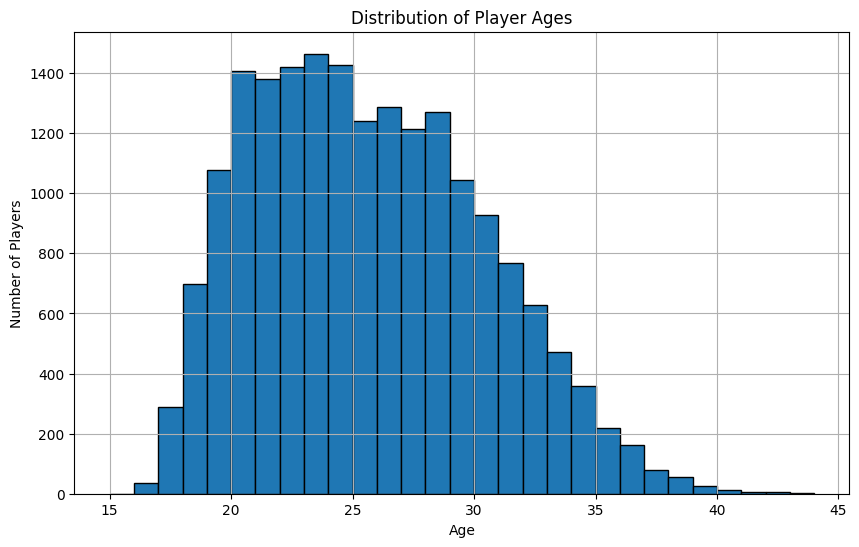

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=range(15, 45), edgecolor='black')
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.grid(True)
plt.show()


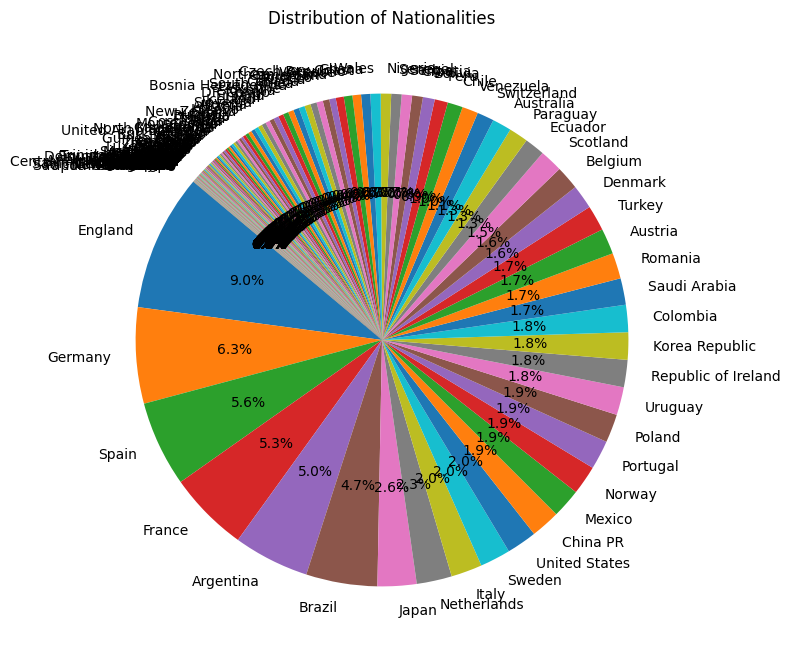

In [64]:
# Calculate the distribution of nationalities
nationality_counts = df['Nationality'].value_counts()

plt.figure(figsize=(12, 8))
plt.pie(nationality_counts, labels=nationality_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Nationalities')
plt.show()


In [18]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv('/kaggle/input/fifa-2021/fifa21_raw_data.csv')

# Display the first few rows to verify
df.head()


/tmp/ipykernel_33/1495455622.py:4: DtypeWarning:

Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.



,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,...,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,...,High,Medium,5 ★,91,85,86,94,36,59,\n273


In [39]:
import plotly.express as px

# Check if the player is in the dataset
if 'Cristiano Ronaldo' in df['Name'].values:
    # Example attributes for a radar chart
    attributes = ['Ball Control', 'Crossing', 'Finishing', 'Dribbling', 'Short Passing']
    player_data = df[df['Name'] == 'Cristiano Ronaldo'][attributes].iloc[0]
    
    # Create a DataFrame for Plotly
    radar_data = pd.DataFrame({
        'Attributes': attributes,
        'Values': player_data
    })
    
    # Create the radar chart
    fig = px.line_polar(radar_data, r='Values', theta='Attributes', line_close=True, title='Cristiano Ronaldo\'s Attributes')
    fig.show()
else:
    print("Cristiano Ronaldo is not in the dataset.")


In [40]:
import plotly.express as px

# Check if the player is in the dataset
if 'Thiago Silva' in df['Name'].values:
    # Example attributes for a radar chart
    attributes = ['Reactions', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Positioning']
    player_data = df[df['Name'] == 'Thiago Silva'][attributes].iloc[0]
    
    # Create a DataFrame for Plotly
    radar_data = pd.DataFrame({
        'Attributes': attributes,
        'Values': player_data
    })
    
    # Create the radar chart
    fig = px.line_polar(radar_data, r='Values', theta='Attributes', line_close=True, title='Thiago Silva\'s Attributes')
    fig.show()
else:
    print("Thiago Silva is not in the dataset.")


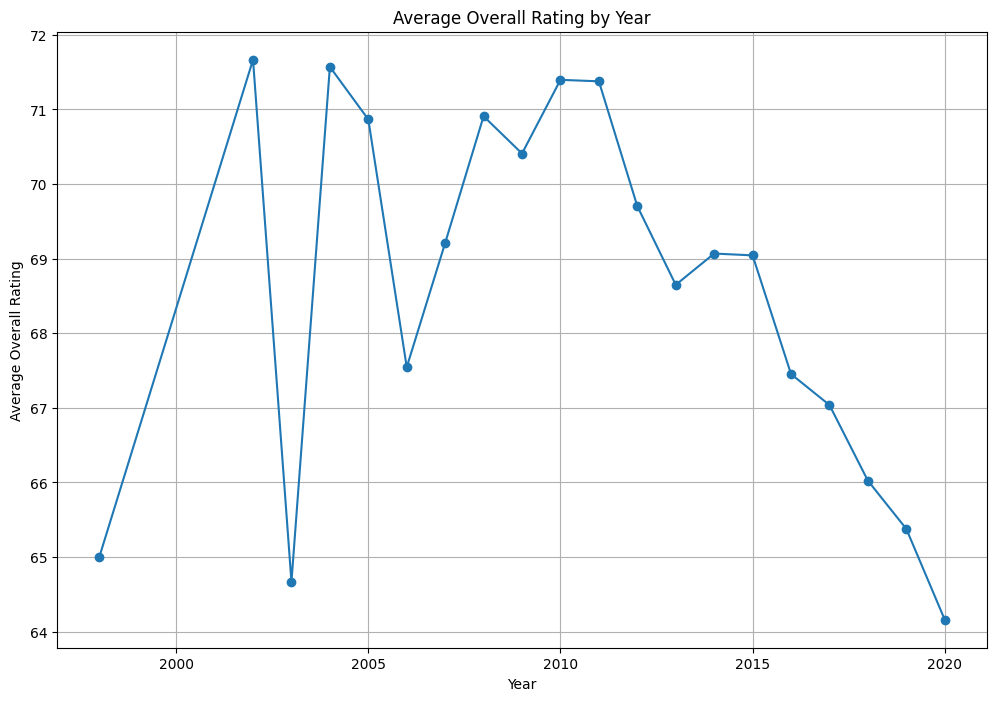

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np


df['Joined'] = pd.to_datetime(df['Joined'], errors='coerce')
df['Year'] = df['Joined'].dt.year

# Calculate average OVA by year
avg_ova_by_year = df.groupby('Year')['OVA'].mean()

plt.figure(figsize=(12, 8))
avg_ova_by_year.plot(marker='o')
plt.title('Average Overall Rating by Year')
plt.xlabel('Year')
plt.ylabel('Average Overall Rating')
plt.grid(True)
plt.show()


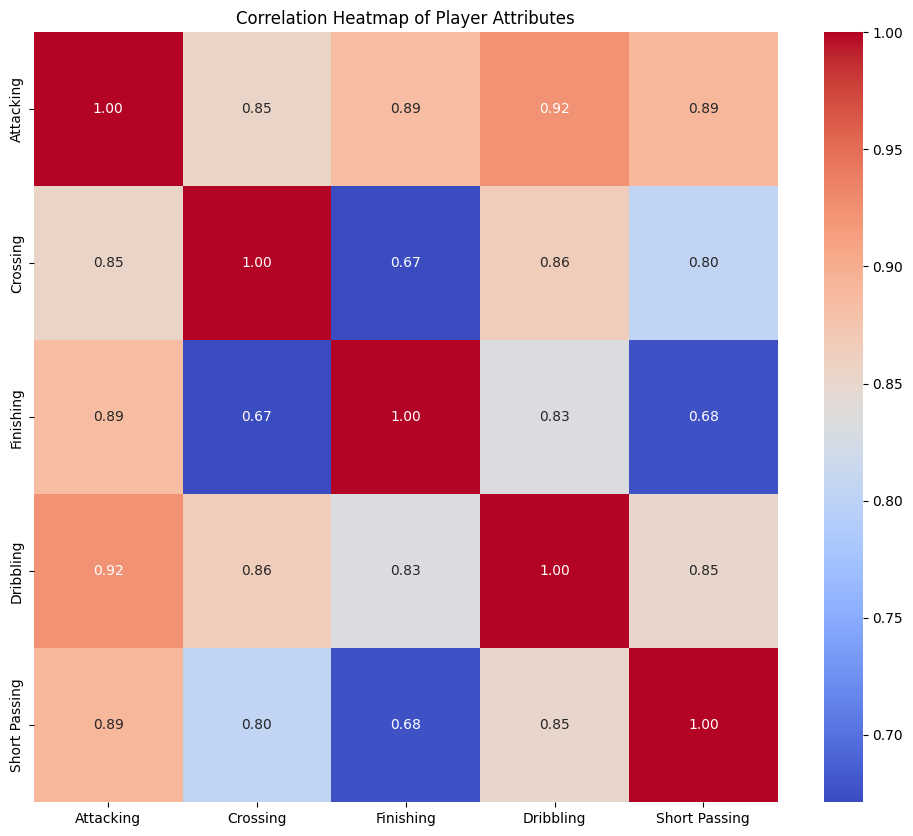

In [21]:
plt.figure(figsize=(12, 10))
correlation_matrix = df[['Attacking', 'Crossing', 'Finishing', 'Dribbling', 'Short Passing']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Player Attributes')
plt.show()


In [26]:
import pandas as pd

# Load the dataset with low_memory=False
df = pd.read_csv('/kaggle/input/fifa-2021/fifa21_raw_data.csv', low_memory=False)

# Display the first few rows to verify
df.head()


,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,...,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,...,High,Medium,5 ★,91,85,86,94,36,59,\n273


In [35]:
import pandas as pd
import numpy as np
import re

# Load the dataset with low_memory=False
df = pd.read_csv('/kaggle/input/fifa-2021/fifa21_raw_data.csv', low_memory=False)

# Function to convert height from feet-inches to cm
def convert_height(height):
    if isinstance(height, str):
        feet, inches = height.split("'")
        inches = inches.replace('"', '')
        return (int(feet) * 30.48) + (int(inches) * 2.54)
    return np.nan

# Apply the function to the Height column
df['Height'] = df['Height'].apply(convert_height)

# Function to convert Value and Wage to numeric values
def convert_currency(value):
    if isinstance(value, str):
        # Remove non-numeric characters except for '.', 'e', and 'E'
        value = re.sub(r'[^\d\.eE]', '', value)
        try:
            return float(eval(value))
        except (SyntaxError, NameError, TypeError):
            return np.nan
    return np.nan

# Apply the function to the Value and Wage columns
df['Value'] = df['Value'].apply(convert_currency)
df['Wage'] = df['Wage'].apply(convert_currency)

# Verify the changes
print(df[['Height', 'Value', 'Wage']].head())


   Height  Value   Wage
0  170.18   67.5  560.0
1  187.96   46.0  220.0
2  187.96   75.0  125.0
3  180.34   87.0  370.0
4  175.26   90.0  270.0


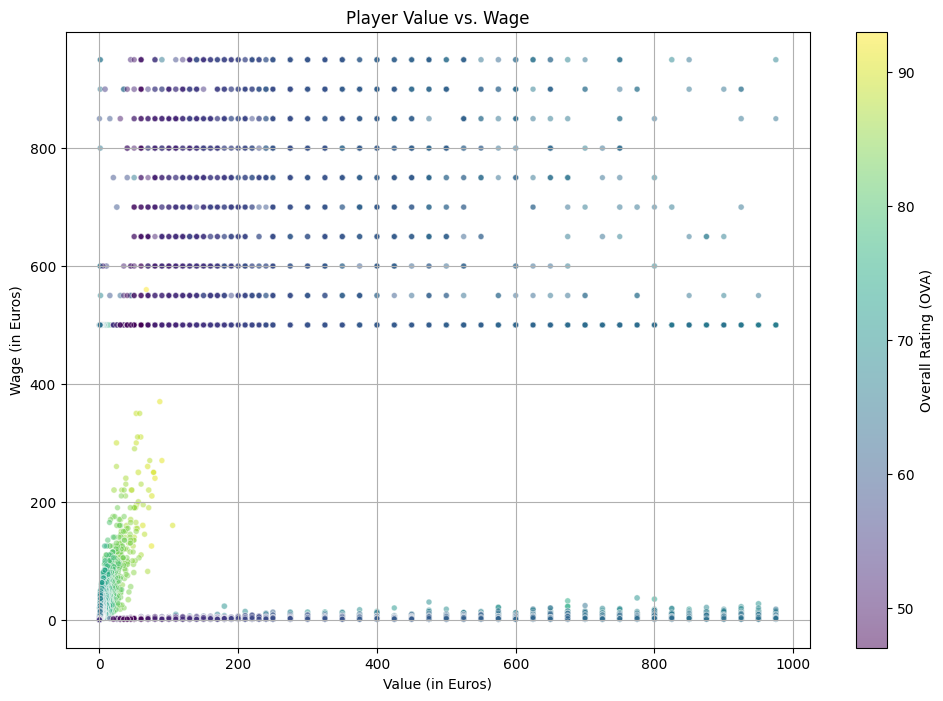

In [36]:
import matplotlib.pyplot as plt

# Filter rows with valid numeric values
valid_rows = df.dropna(subset=['Value', 'Wage', 'Height', 'OVA'])

plt.figure(figsize=(12, 8))
plt.scatter(valid_rows['Value'], valid_rows['Wage'], alpha=0.5, s=valid_rows['Height']/10, c=valid_rows['OVA'], cmap='viridis', edgecolors='w', linewidth=0.5)
plt.colorbar(label='Overall Rating (OVA)')
plt.title('Player Value vs. Wage')
plt.xlabel('Value (in Euros)')
plt.ylabel('Wage (in Euros)')
plt.grid(True)
plt.show()


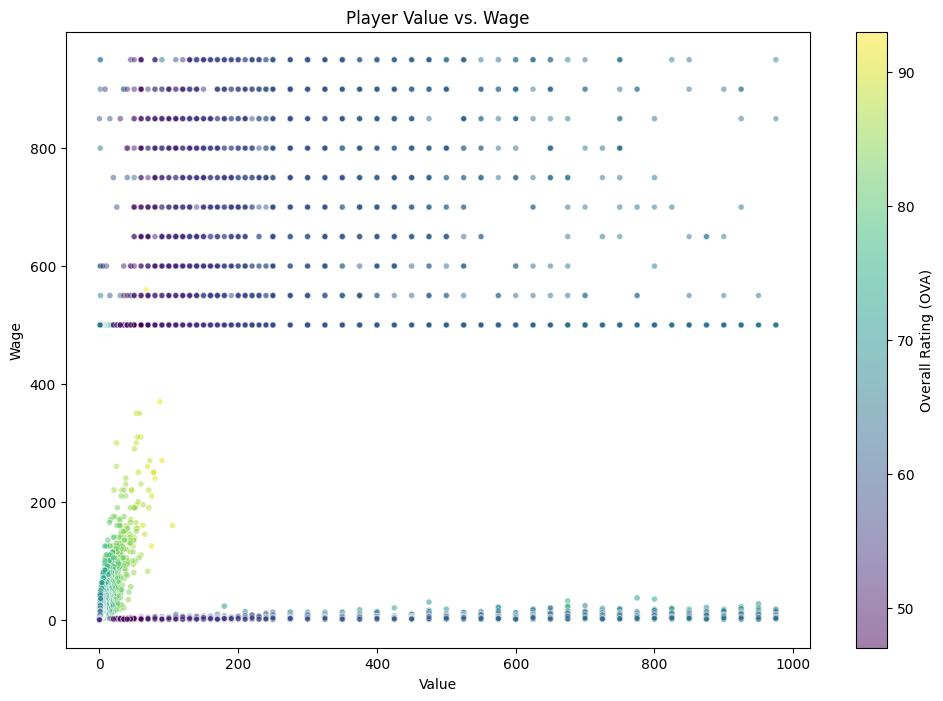

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



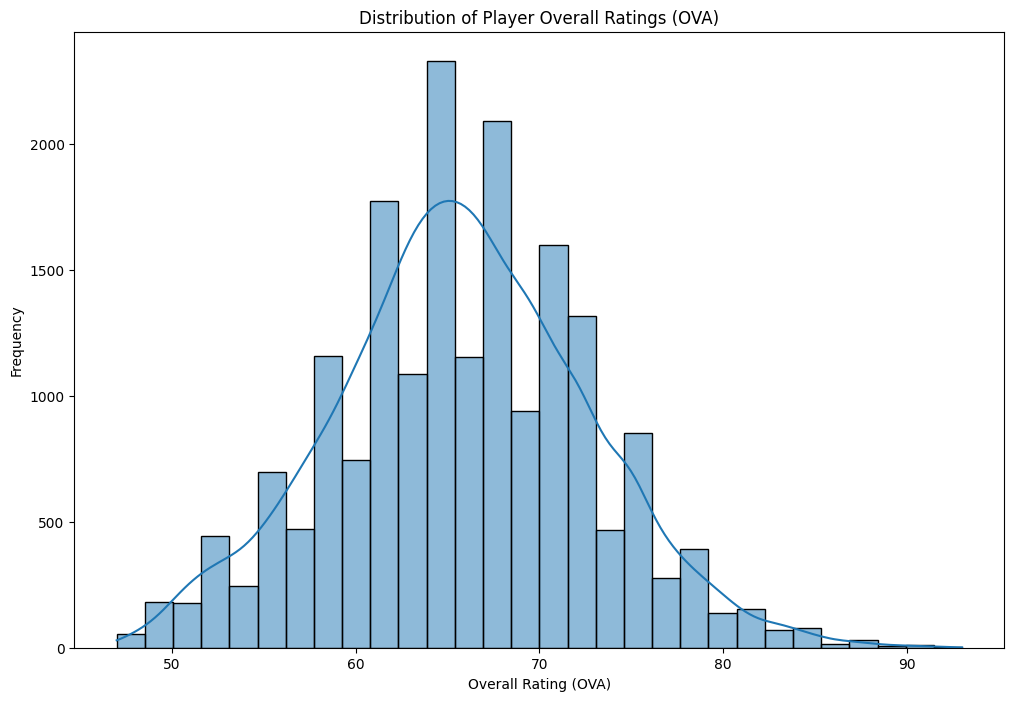

In [41]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.histplot(df['OVA'], bins=30, kde=True)
plt.title('Distribution of Player Overall Ratings (OVA)')
plt.xlabel('Overall Rating (OVA)')
plt.ylabel('Frequency')
plt.show()


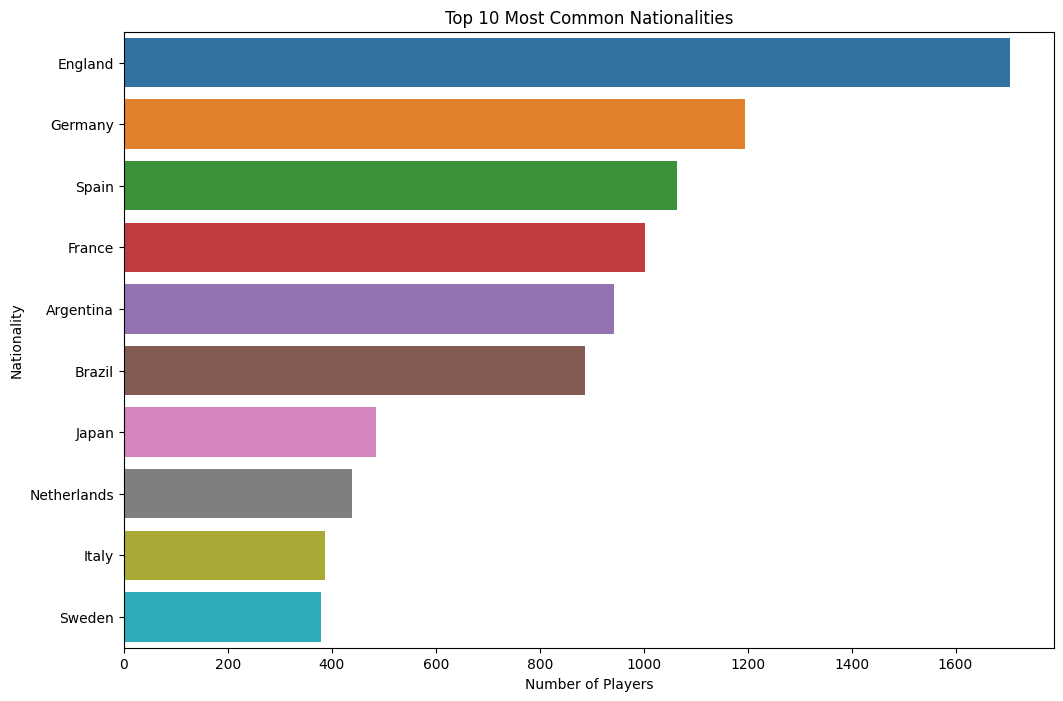

In [42]:
plt.figure(figsize=(12, 8))
top_nationalities = df['Nationality'].value_counts().head(10)
sns.barplot(x=top_nationalities.values, y=top_nationalities.index)
plt.title('Top 10 Most Common Nationalities')
plt.xlabel('Number of Players')
plt.ylabel('Nationality')
plt.show()


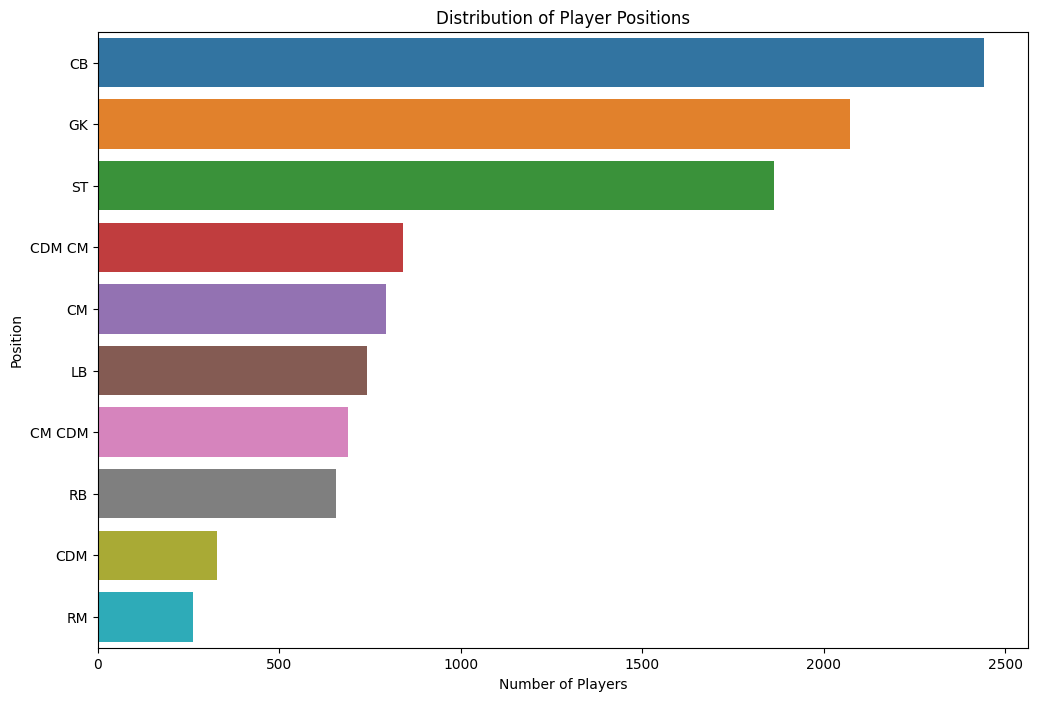

In [44]:
plt.figure(figsize=(12, 8))
positions = df['Positions'].str.get_dummies(sep=',').sum().sort_values(ascending=False).head(10)
sns.barplot(x=positions.values, y=positions.index)
plt.title('Distribution of Player Positions')
plt.xlabel('Number of Players')
plt.ylabel('Position')
plt.show()


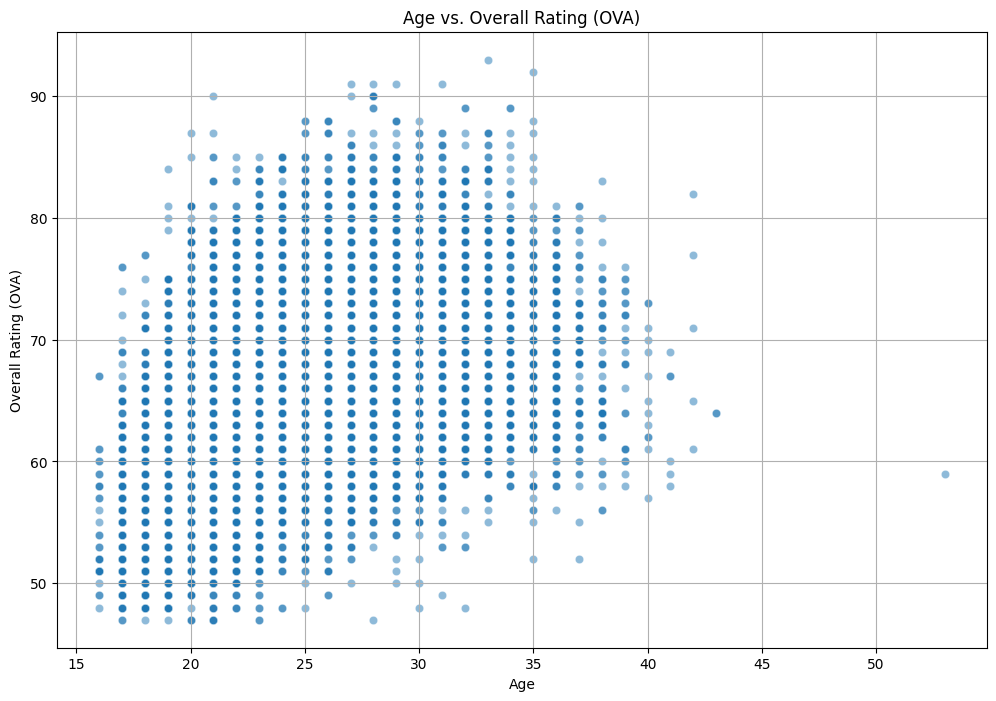

In [46]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='OVA', data=df, alpha=0.5)
plt.title('Age vs. Overall Rating (OVA)')
plt.xlabel('Age')
plt.ylabel('Overall Rating (OVA)')
plt.grid(True)
plt.show()


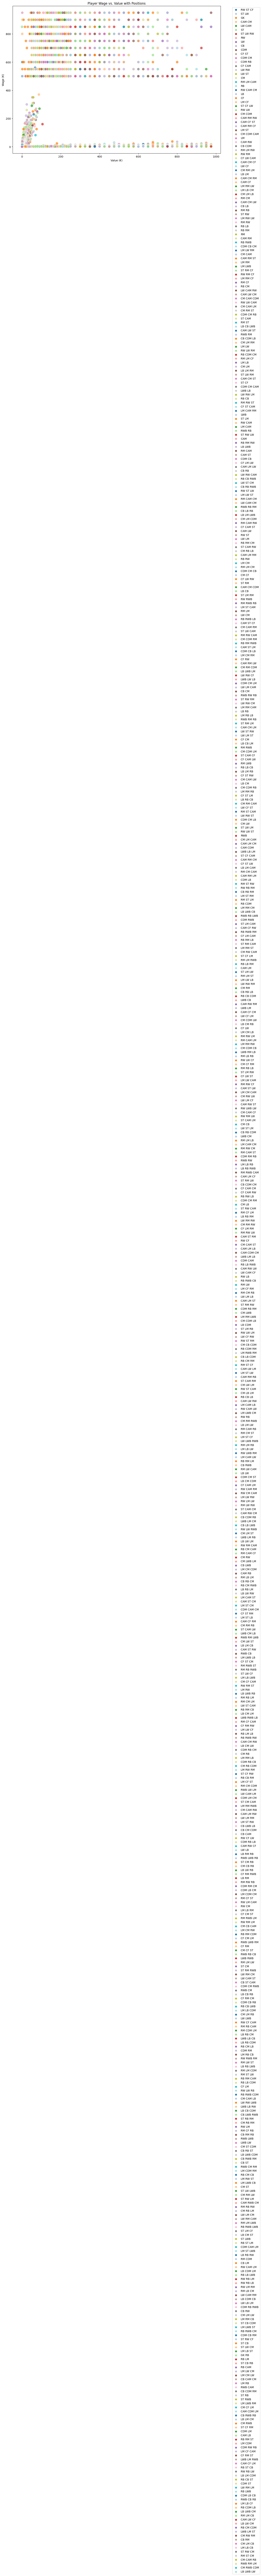

In [48]:
plt.figure(figsize=(14, 10))
sns.scatterplot(x='Value', y='Wage', hue='Positions', data=df, palette='tab20', alpha=0.7, edgecolor='w', s=100)
plt.title('Player Wage vs. Value with Positions')
plt.xlabel('Value (€)')
plt.ylabel('Wage (€)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


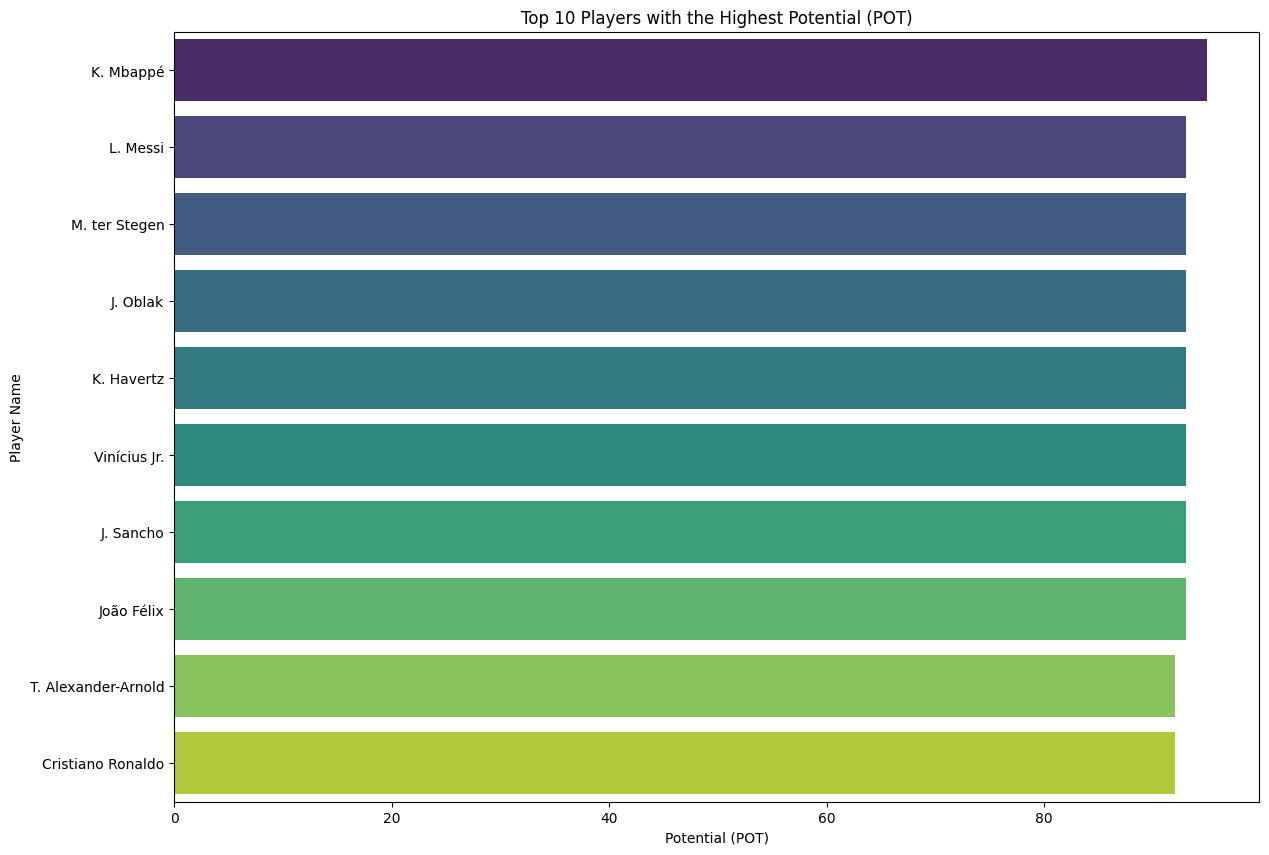

In [50]:
top_potential_players = df[['Name', 'POT']].sort_values(by='POT', ascending=False).head(10)

plt.figure(figsize=(14, 10))
sns.barplot(x='POT', y='Name', data=top_potential_players, palette='viridis')
plt.title('Top 10 Players with the Highest Potential (POT)')
plt.xlabel('Potential (POT)')
plt.ylabel('Player Name')
plt.show()


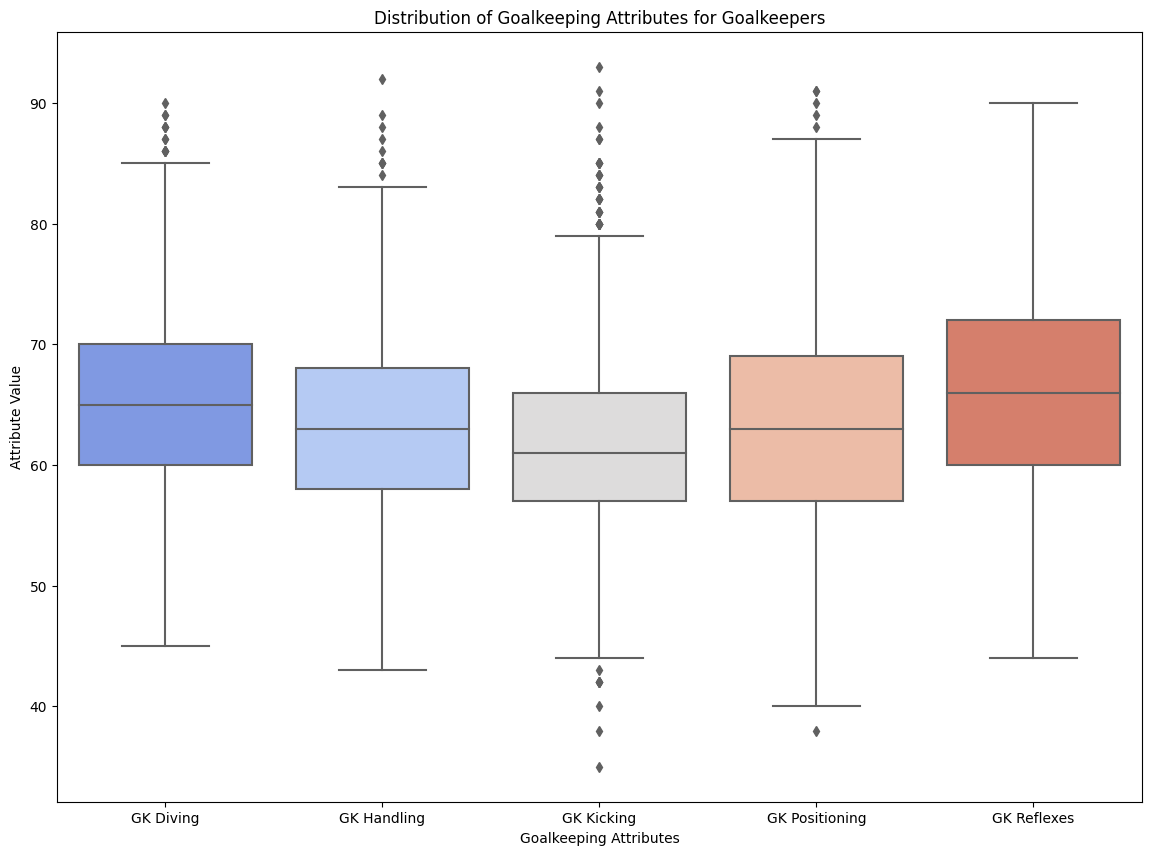

In [51]:
goalkeeping_attributes = ['GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']
gk_data = df[df['Positions'].str.contains('GK')]

plt.figure(figsize=(14, 10))
sns.boxplot(data=gk_data[goalkeeping_attributes], palette='coolwarm')
plt.title('Distribution of Goalkeeping Attributes for Goalkeepers')
plt.xlabel('Goalkeeping Attributes')
plt.ylabel('Attribute Value')
plt.show()


In [63]:
#Inferences

# **Inferences**


# For approx the same transfer value, attacking players are paid higher wages than defending players

# Players usually hit their peak rating 8-10 years after starting their career

# Dribbling, Finishing, and Short Passing are the biggest indicators of attacking potential


# English players and Centre Backs are most well-represented players 